In [58]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os
import csv

In [59]:
# define variables, lists

# project happiness survey categories
categories = ['Happiness Score', 'Family', 'Health', 'Freedom', 'Perceptions of Corruption', 'Generosity']

In [60]:
# Load csv files containing the data from the Happiness Surveys for the years 2015 through 2019 and 2022
clean_data_df = pd.read_csv('Output_data/Happiness_df.csv')
clean_data_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Freedom (2019),Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.572,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.591,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.592,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.603,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.584,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.352,0.090,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.255,0.113,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.000,0.025,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.349,0.082,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127


In [61]:
# confirm lack of NaN values
clean_data_df.isnull().values.any()

False

## SOCIAL SUPPORT / FAMILY Projections

In [62]:
# year 2022 1/2
loop_category = categories[1] # Social Support/Family Projections Category (Factor)

# create new DataFrame to store projections
##  set up category (factor) DataFrame
new_factor = f'{loop_category}'
new_factor = new_factor.lower()
new_factor = f'{new_factor}_proj_df'  # for example:  health_proj_df


new_factor = pd.DataFrame(clean_data_df[['Country']])
agg_2027_data = pd.DataFrame(clean_data_df[['Country']]) # accumulator for 2027 projections
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2015)'] +
           clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2022 1/2) Proj'] = temp_avg
new_factor[f'{loop_category} (2022 1/2) Proj'] = temp_avg
# new_factor #, clean_data_df

In [63]:
# year 2023
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2023) Proj'] = temp_avg
new_factor[f'{loop_category} (2023) Proj'] = temp_avg
# new_factor #, clean_data_df

In [64]:
# year 2024
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2024) Proj'] = temp_avg
new_factor[f'{loop_category} (2024) Proj'] = temp_avg
# new_factor #, clean_data_df

In [65]:
# year 2025
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2025) Proj'] = temp_avg
new_factor[f'{loop_category} (2025) Proj'] = temp_avg
# new_factor #, clean_data_df

In [66]:
# year 2026
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2026) Proj'] = temp_avg
new_factor[f'{loop_category} (2026) Proj'] = temp_avg
# new_factor #, clean_data_df

In [67]:
# year 2027
# add new projections to original and new category (factor) DataFrame
#
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj'] +
           clean_data_df[f'{loop_category} (2026) Proj']          
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2027) Proj'] = temp_avg
new_factor[f'{loop_category} (2027) Proj'] = temp_avg
agg_2027_data[f'{loop_category} (2027) Proj'] = temp_avg
# previous years
past_data = f'{loop_category}_past_data_df'

past_data = pd.DataFrame(clean_data_df[['Country',
                                        f'{loop_category} (2015)',
                                        f'{loop_category} (2016)',
                                        f'{loop_category} (2017)',
                                        f'{loop_category} (2018)',
                                        f'{loop_category} (2019)',
                                        f'{loop_category} (2022)',
                                       ]])

# pleasing to the eye and informative of history
past_info = f'{loop_category} Current Data'
print(past_info)
past_data

Family Current Data


,Country,Family (2015),Family (2016),Family (2017),Family (2018),Family (2019),Family (2022)
0,Switzerland,1.34951,1.14524,1.516912,1.549,1.526,1.226
1,Iceland,1.40223,1.18326,1.610574,1.644,1.624,1.320
2,Denmark,1.36058,1.16374,1.551122,1.590,1.573,1.243
3,Norway,1.33095,1.12690,1.533524,1.582,1.582,1.239
4,Canada,1.32261,1.09610,1.481349,1.532,1.505,1.188
...,...,...,...,...,...,...,...
111,Ivory Coast,0.77115,0.57576,0.904780,0.872,0.808,0.442
112,Burkina Faso,0.85188,0.63054,1.043280,1.097,1.056,0.565
113,Afghanistan,0.30285,0.11037,0.581543,0.537,0.517,0.000
114,Benin,0.35386,0.10419,0.435300,0.372,0.437,0.064


In [68]:
proj_info = f'{loop_category} Projection Data'
new_factor.to_csv(f'Output_data/{proj_info}.csv', index=False)
print(proj_info)
new_factor

Family Projection Data


,Country,Family (2022 1/2) Proj,Family (2023) Proj,Family (2024) Proj,Family (2025) Proj,Family (2026) Proj,Family (2027) Proj
0,Switzerland,1.357332,1.358897,1.401628,1.378571,1.344486,1.368183
1,Iceland,1.432013,1.437969,1.488911,1.464579,1.428694,1.450433
2,Denmark,1.381688,1.385910,1.430344,1.406188,1.369426,1.394711
3,Norway,1.362475,1.368780,1.417156,1.393882,1.356258,1.379710
4,Canada,1.324012,1.324292,1.369931,1.347647,1.310776,1.335332
...,...,...,...,...,...,...,...
111,Ivory Coast,0.713138,0.701536,0.726691,0.691073,0.654887,0.697465
112,Burkina Faso,0.837540,0.834672,0.875498,0.841942,0.790930,0.836117
113,Afghanistan,0.306353,0.307053,0.346390,0.299359,0.251831,0.302197
114,Benin,0.265870,0.248272,0.277088,0.245446,0.220135,0.251362


In [69]:
# Top 5 in category
new_factor = new_factor.sort_values(by=[f'{loop_category} (2027) Proj'], ascending=False)
new_factor = new_factor[['Country', f'{loop_category} (2027) Proj']]
print(f'{proj_info} Most Happy')
new_factor.head(5)

Family Projection Data Most Happy


,Country,Family (2027) Proj
1,Iceland,1.450433
2,Denmark,1.394711
8,New Zealand,1.392532
5,Finland,1.389476
3,Norway,1.379710


In [70]:
# Bottom 5 in category
print(f'{proj_info} Least Happy')
new_factor.tail(5)

Family Projection Data Least Happy


,Country,Family (2027) Proj
98,Georgia,0.515601
99,Malawi,0.386383
115,Togo,0.320139
113,Afghanistan,0.302197
114,Benin,0.251362


## HEALTH Projections

In [71]:
# year 2022 1/2
loop_category = categories[2] # Health Projections Category (Factor)

# create new DataFrame to store projections
##  set up category (factor) DataFrame
new_factor = f'{loop_category}'
new_factor = new_factor.lower()
new_factor = f'{new_factor}_proj_df'  # for example:  health_proj_df


new_factor = pd.DataFrame(clean_data_df[['Country']])
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2015)'] +
           clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2022 1/2) Proj'] = temp_avg
new_factor[f'{loop_category} (2022 1/2) Proj'] = temp_avg
# new_factor #, clean_data_df

In [72]:
# year 2023
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2023) Proj'] = temp_avg
new_factor[f'{loop_category} (2023) Proj'] = temp_avg
# new_factor #, clean_data_df

In [73]:
# year 2024
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2024) Proj'] = temp_avg
new_factor[f'{loop_category} (2024) Proj'] = temp_avg
# new_factor #, clean_data_df

In [74]:
# year 2025
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2025) Proj'] = temp_avg
new_factor[f'{loop_category} (2025) Proj'] = temp_avg
# new_factor #, clean_data_df

In [75]:
# year 2026
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2026) Proj'] = temp_avg
new_factor[f'{loop_category} (2026) Proj'] = temp_avg
# new_factor #, clean_data_df

In [76]:
# year 2027
# add new projections to original and new category (factor) DataFrame
#
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj'] +
           clean_data_df[f'{loop_category} (2026) Proj']          
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2027) Proj'] = temp_avg
new_factor[f'{loop_category} (2027) Proj'] = temp_avg
agg_2027_data[f'{loop_category} (2027) Proj'] = temp_avg

# previous years
past_data = f'{loop_category}_past_data_df'

past_data = pd.DataFrame(clean_data_df[['Country',
                                        f'{loop_category} (2015)',
                                        f'{loop_category} (2016)',
                                        f'{loop_category} (2017)',
                                        f'{loop_category} (2018)',
                                        f'{loop_category} (2019)',
                                        f'{loop_category} (2022)',
                                       ]])
# pleasing to the eye and informative of history
past_info = f'{loop_category} Historical Data'
print(past_info)
past_data

Health Historical Data


,Country,Health (2015),Health (2016),Health (2017),Health (2018),Health (2019),Health (2022)
0,Switzerland,0.94143,0.86303,0.858131,0.927,1.052,0.822
1,Iceland,0.94784,0.86733,0.833552,0.914,1.026,0.803
2,Denmark,0.87464,0.79504,0.792566,0.868,0.996,0.777
3,Norway,0.88521,0.79579,0.796667,0.861,1.028,0.786
4,Canada,0.90563,0.82760,0.834558,0.896,1.039,0.783
...,...,...,...,...,...,...,...
111,Ivory Coast,0.15185,0.04476,0.048642,0.080,0.232,0.322
112,Burkina Faso,0.27125,0.21297,0.215844,0.254,0.380,0.320
113,Afghanistan,0.30335,0.17344,0.180747,0.255,0.361,0.289
114,Benin,0.31910,0.21028,0.209930,0.240,0.397,0.335


In [77]:
proj_info = f'{loop_category} Projection Data'
new_factor.to_csv(f'Output_data/{proj_info}.csv', index=False)
print(proj_info)
new_factor

Health Projection Data


,Country,Health (2022 1/2) Proj,Health (2023) Proj,Health (2024) Proj,Health (2025) Proj,Health (2026) Proj,Health (2027) Proj
0,Switzerland,0.882318,0.870496,0.871989,0.874761,0.864313,0.872775
1,Iceland,0.873144,0.858205,0.856380,0.860946,0.850335,0.859802
2,Denmark,0.821449,0.810811,0.813965,0.818245,0.808294,0.814553
3,Norway,0.824933,0.812878,0.816296,0.820221,0.812066,0.817279
4,Canada,0.849358,0.838103,0.840204,0.841333,0.830399,0.839879
...,...,...,...,...,...,...,...
111,Ivory Coast,0.129450,0.124971,0.141013,0.159487,0.175384,0.146061
112,Burkina Faso,0.254813,0.251525,0.259237,0.267915,0.270698,0.260838
113,Afghanistan,0.240307,0.227699,0.238551,0.250111,0.249134,0.241160
114,Benin,0.262862,0.251614,0.259881,0.269872,0.275846,0.264015


In [78]:
# Top 5 in category
new_factor = new_factor.sort_values(by=[f'{loop_category} (2027) Proj'], ascending=False)
new_factor = new_factor[['Country', f'{loop_category} (2027) Proj']]
print(f'{proj_info} Most Happy')
new_factor.head(5)

Health Projection Data Most Happy


,Country,Health (2027) Proj
20,Singapore,0.941184
35,Japan,0.925204
36,South Korea,0.900017
30,Spain,0.888462
0,Switzerland,0.872775


In [79]:
# Bottom 5 in category
print(f'{proj_info} Least Happy')
new_factor.tail(5)

Health Projection Data Least Happy


,Country,Health (2027) Proj
104,Mali,0.209179
101,Cameroon,0.207837
111,Ivory Coast,0.146061
62,Nigeria,0.134645
94,Sierra Leone,0.082429


## FREEDOM Projections

In [80]:
# year 2022 1/2
loop_category = categories[3] # Freedom Projections Category (Factor)

# create new DataFrame to store projections
##  set up category (factor) DataFrame
new_factor = f'{loop_category}'
new_factor = new_factor.lower()
new_factor = f'{new_factor}_proj_df'  # for example:  health_proj_df


new_factor = pd.DataFrame(clean_data_df[['Country']])
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2015)'] +
           clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2022 1/2) Proj'] = temp_avg
new_factor[f'{loop_category} (2022 1/2) Proj'] = temp_avg
# new_factor #, clean_data_df

In [81]:
# year 2023
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2023) Proj'] = temp_avg
new_factor[f'{loop_category} (2023) Proj'] = temp_avg
# new_factor #, clean_data_df

In [82]:
# year 2024
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2024) Proj'] = temp_avg
new_factor[f'{loop_category} (2024) Proj'] = temp_avg
# new_factor #, clean_data_df

In [83]:
# year 2025
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2025) Proj'] = temp_avg
new_factor[f'{loop_category} (2025) Proj'] = temp_avg
# new_factor #, clean_data_df

In [84]:
# year 2026
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2026) Proj'] = temp_avg
new_factor[f'{loop_category} (2026) Proj'] = temp_avg
# new_factor #, clean_data_df

In [85]:
# year 2027
# add new projections to original and new category (factor) DataFrame
#
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj'] +
           clean_data_df[f'{loop_category} (2026) Proj']          
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2027) Proj'] = temp_avg
new_factor[f'{loop_category} (2027) Proj'] = temp_avg
agg_2027_data[f'{loop_category} (2027) Proj'] = temp_avg

# previous years
past_data = f'{loop_category}_past_data_df'

past_data = pd.DataFrame(clean_data_df[['Country',
                                        f'{loop_category} (2015)',
                                        f'{loop_category} (2016)',
                                        f'{loop_category} (2017)',
                                        f'{loop_category} (2018)',
                                        f'{loop_category} (2019)',
                                        f'{loop_category} (2022)',
                                       ]])
# pleasing to the eye and informative of history
past_info = f'{loop_category} Historical Data'
print(past_info)
past_data

Freedom Historical Data


,Country,Freedom (2015),Freedom (2016),Freedom (2017),Freedom (2018),Freedom (2019),Freedom (2022)
0,Switzerland,0.66557,0.58557,0.620071,0.660,0.572,0.677
1,Iceland,0.62877,0.56624,0.627163,0.677,0.591,0.718
2,Denmark,0.64938,0.57941,0.626007,0.683,0.592,0.719
3,Norway,0.66973,0.59609,0.635423,0.686,0.603,0.728
4,Canada,0.63297,0.57370,0.611101,0.653,0.584,0.659
...,...,...,...,...,...,...,...
111,Ivory Coast,0.46866,0.40663,0.447706,0.467,0.352,0.451
112,Burkina Faso,0.39493,0.33370,0.324368,0.312,0.255,0.382
113,Afghanistan,0.23414,0.16430,0.106180,0.085,0.000,0.000
114,Benin,0.48450,0.39747,0.425963,0.440,0.349,0.479


In [86]:
proj_info = f'{loop_category} Projection Data'
new_factor.to_csv(f'Output_data/{proj_info}.csv', index=False)
print(proj_info)
new_factor

Freedom Projection Data


,Country,Freedom (2022 1/2) Proj,Freedom (2023) Proj,Freedom (2024) Proj,Freedom (2025) Proj,Freedom (2026) Proj,Freedom (2027) Proj
0,Switzerland,0.641642,0.636857,0.647114,0.652522,0.651027,0.645832
1,Iceland,0.643435,0.646367,0.662393,0.669439,0.667927,0.657912
2,Denmark,0.651359,0.651755,0.666224,0.674268,0.672521,0.663226
3,Norway,0.663049,0.661712,0.674837,0.682719,0.682063,0.672876
4,Canada,0.625954,0.624551,0.634721,0.639445,0.636734,0.632281
...,...,...,...,...,...,...,...
111,Ivory Coast,0.448199,0.444107,0.451603,0.452382,0.449458,0.449150
112,Burkina Faso,0.349400,0.340293,0.341612,0.345061,0.351673,0.345608
113,Afghanistan,0.117924,0.094681,0.080757,0.075672,0.073807,0.088568
114,Benin,0.445387,0.437564,0.445583,0.449507,0.451408,0.445890


In [87]:
# Top 5 in category
new_factor = new_factor.sort_values(by=[f'{loop_category} (2027) Proj'], ascending=False)
new_factor = new_factor[['Country', f'{loop_category} (2027) Proj']]
print(f'{proj_info} Most Happy')
new_factor.head(5)

Freedom Projection Data Most Happy


,Country,Freedom (2027) Proj
33,Uzbekistan,0.684810
108,Cambodia,0.676841
3,Norway,0.672876
5,Finland,0.664171
2,Denmark,0.663226


In [88]:
# Bottom 5 in category
print(f'{proj_info} Least Happy')
new_factor.tail(5)

Freedom Projection Data Least Happy


,Country,Freedom (2027) Proj
86,Ukraine,0.248970
19,Venezuela,0.216566
54,Algeria,0.167868
78,Greece,0.143183
113,Afghanistan,0.088568


## GOVERNMENT TRUST (Perceptions of Corruption) Projections

In [89]:
# year 2022 1/2
loop_category = categories[4] # Government Trust Projections Category (Factor)

# create new DataFrame to store projections
##  set up category (factor) DataFrame
new_factor = f'{loop_category}'
new_factor = new_factor.lower()
new_factor = f'{new_factor}_proj_df'  # for example:  health_proj_df


new_factor = pd.DataFrame(clean_data_df[['Country']])
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2015)'] +
           clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2022 1/2) Proj'] = temp_avg
new_factor[f'{loop_category} (2022 1/2) Proj'] = temp_avg
# new_factor #, clean_data_df

In [90]:
# year 2023
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2023) Proj'] = temp_avg
new_factor[f'{loop_category} (2023) Proj'] = temp_avg
# new_factor #, clean_data_df

In [91]:
# year 2024
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2024) Proj'] = temp_avg
new_factor[f'{loop_category} (2024) Proj'] = temp_avg
# new_factor #, clean_data_df

In [92]:
# year 2025
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2025) Proj'] = temp_avg
new_factor[f'{loop_category} (2025) Proj'] = temp_avg
# new_factor #, clean_data_df

In [93]:
# year 2026
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2026) Proj'] = temp_avg
new_factor[f'{loop_category} (2026) Proj'] = temp_avg
# new_factor #, clean_data_df

In [94]:
# year 2027
# add new projections to original and new category (factor) DataFrame
#
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj'] +
           clean_data_df[f'{loop_category} (2026) Proj']          
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2027) Proj'] = temp_avg
new_factor[f'{loop_category} (2027) Proj'] = temp_avg
agg_2027_data[f'{loop_category} (2027) Proj'] = temp_avg

# previous years
past_data = f'{loop_category}_past_data_df'

past_data = pd.DataFrame(clean_data_df[['Country',
                                        f'{loop_category} (2015)',
                                        f'{loop_category} (2016)',
                                        f'{loop_category} (2017)',
                                        f'{loop_category} (2018)',
                                        f'{loop_category} (2019)',
                                        f'{loop_category} (2022)',
                                       ]])
# pleasing to the eye and informative of history
past_info = f'{loop_category} Current Data'
print(past_info)
past_data

Perceptions of Corruption Current Data


,Country,Perceptions of Corruption (2015),Perceptions of Corruption (2016),Perceptions of Corruption (2017),Perceptions of Corruption (2018),Perceptions of Corruption (2019),Perceptions of Corruption (2022)
0,Switzerland,0.41978,0.41203,0.367007,0.357,0.343,0.461
1,Iceland,0.14145,0.14975,0.153527,0.138,0.118,0.191
2,Denmark,0.48357,0.44453,0.400770,0.408,0.410,0.532
3,Norway,0.36503,0.35776,0.315964,0.340,0.341,0.474
4,Canada,0.32957,0.31329,0.287372,0.291,0.308,0.368
...,...,...,...,...,...,...,...
111,Ivory Coast,0.17922,0.15530,0.130062,0.103,0.090,0.124
112,Burkina Faso,0.12832,0.12533,0.120328,0.128,0.113,0.126
113,Afghanistan,0.09719,0.07112,0.061158,0.036,0.025,0.005
114,Benin,0.08010,0.06681,0.060929,0.067,0.082,0.230


In [95]:
proj_info = f'{loop_category} Projection Data'
new_factor.to_csv(f'Output_data/{proj_info}.csv', index=False)
print(proj_info)
new_factor

Perceptions of Corruption Projection Data


,Country,Perceptions of Corruption (2022 1/2) Proj,Perceptions of Corruption (2023) Proj,Perceptions of Corruption (2024) Proj,Perceptions of Corruption (2025) Proj,Perceptions of Corruption (2026) Proj,Perceptions of Corruption (2027) Proj
0,Switzerland,0.403363,0.400080,0.397690,0.403827,0.413192,0.403631
1,Iceland,0.154745,0.157404,0.158935,0.160017,0.164420,0.159104
2,Denmark,0.453774,0.447815,0.448472,0.458012,0.468015,0.455217
3,Norway,0.370551,0.371655,0.374434,0.386128,0.395354,0.379624
4,Canada,0.317846,0.315502,0.315944,0.321658,0.327790,0.319748
...,...,...,...,...,...,...,...
111,Ivory Coast,0.138316,0.130136,0.125103,0.124111,0.128333,0.129200
112,Burkina Faso,0.125596,0.125051,0.124995,0.125928,0.125514,0.125417
113,Afghanistan,0.054094,0.045474,0.040345,0.036183,0.036219,0.042463
114,Benin,0.100968,0.105141,0.112808,0.123183,0.134420,0.115304


In [96]:
# Top 5 in category
new_factor = new_factor.sort_values(by=[f'{loop_category} (2027) Proj'], ascending=False)
new_factor = new_factor[['Country', f'{loop_category} (2027) Proj']]
print(f'{proj_info} Most Happy')
new_factor.head(5)

Perceptions of Corruption Projection Data Most Happy


,Country,Perceptions of Corruption (2027) Proj
20,Singapore,0.502097
2,Denmark,0.455217
5,Finland,0.437102
7,Sweden,0.430194
8,New Zealand,0.423588


In [97]:
# Bottom 5 in category
print(f'{proj_info} Least Happy')
new_factor.tail(5)

Perceptions of Corruption Projection Data Least Happy


,Country,Perceptions of Corruption (2027) Proj
86,Ukraine,0.017960
41,Moldova,0.014684
102,Bulgaria,0.012545
68,Romania,0.004534
75,Bosnia and Herzegovina,0.001974


## Generosity

In [98]:
# year 2022 1/2
loop_category = categories[5] # Generosity Projections Category (Factor)

# create new DataFrame to store projections
##  set up category (factor) DataFrame
new_factor = f'{loop_category}'
new_factor = new_factor.lower()
new_factor = f'{new_factor}_proj_df'  # for example:  health_proj_df


new_factor = pd.DataFrame(clean_data_df[['Country']])
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2015)'] +
           clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2022 1/2) Proj'] = temp_avg
new_factor[f'{loop_category} (2022 1/2) Proj'] = temp_avg
# new_factor #, clean_data_df

In [99]:
# year 2023
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2016)'] +
           clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2023) Proj'] = temp_avg
new_factor[f'{loop_category} (2023) Proj'] = temp_avg
# new_factor #, clean_data_df

In [100]:
# year 2024
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2017)'] +
           clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2024) Proj'] = temp_avg
new_factor[f'{loop_category} (2024) Proj'] = temp_avg
# new_factor #, clean_data_df

In [101]:
# year 2025
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2018)'] +
           clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2025) Proj'] = temp_avg
new_factor[f'{loop_category} (2025) Proj'] = temp_avg
# new_factor #, clean_data_df

In [102]:
# year 2026
# add new projections to original and new category (factor) DataFrame
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022)'] +
           clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj']                                              
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2026) Proj'] = temp_avg
new_factor[f'{loop_category} (2026) Proj'] = temp_avg
# new_factor #, clean_data_df

In [103]:
# year 2027
# add new projections to original and new category (factor) DataFrame
#
# calculate averages
temp_avg=((clean_data_df[f'{loop_category} (2022 1/2) Proj'] +
           clean_data_df[f'{loop_category} (2023) Proj'] +
           clean_data_df[f'{loop_category} (2024) Proj'] +
           clean_data_df[f'{loop_category} (2025) Proj'] +
           clean_data_df[f'{loop_category} (2026) Proj']          
        ) / 5)
# add averages to both the original file for further processing and to new category (factor) file
clean_data_df[f'{loop_category} (2027) Proj'] = temp_avg
new_factor[f'{loop_category} (2027) Proj'] = temp_avg
agg_2027_data[f'{loop_category} (2027) Proj'] = temp_avg

# previous years
past_data = f'{loop_category}_past_data_df'

past_data = pd.DataFrame(clean_data_df[['Country',
                                        f'{loop_category} (2015)',
                                        f'{loop_category} (2016)',
                                        f'{loop_category} (2017)',
                                        f'{loop_category} (2018)',
                                        f'{loop_category} (2019)',
                                        f'{loop_category} (2022)',
                                       ]])
# pleasing to the eye and informative of history
past_info = f'{loop_category} Historical Data'
print(past_info)
past_data

Generosity Historical Data


,Country,Generosity (2015),Generosity (2016),Generosity (2017),Generosity (2018),Generosity (2019),Generosity (2022)
0,Switzerland,0.29678,0.28083,0.290549,0.256,0.263,0.147
1,Iceland,0.43630,0.47678,0.475540,0.353,0.354,0.270
2,Denmark,0.34139,0.36171,0.355280,0.284,0.252,0.188
3,Norway,0.34699,0.37895,0.362012,0.286,0.271,0.217
4,Canada,0.45811,0.44834,0.435540,0.321,0.285,0.217
...,...,...,...,...,...,...,...
111,Ivory Coast,0.20165,0.20338,0.201237,0.146,0.154,0.149
112,Burkina Faso,0.21747,0.24353,0.250865,0.175,0.177,0.186
113,Afghanistan,0.36510,0.31268,0.311871,0.191,0.158,0.089
114,Benin,0.18260,0.20180,0.207948,0.163,0.175,0.127


In [104]:
proj_info = f'{loop_category} Projection Data'
new_factor.to_csv(f'Output_data/{proj_info}.csv', index=False)
print(proj_info)
new_factor

Generosity Projection Data


,Country,Generosity (2022 1/2) Proj,Generosity (2023) Proj,Generosity (2024) Proj,Generosity (2025) Proj,Generosity (2026) Proj,Generosity (2027) Proj
0,Switzerland,0.254232,0.245722,0.238701,0.228331,0.222797,0.237957
1,Iceland,0.402324,0.395529,0.379279,0.360026,0.361432,0.379718
2,Denmark,0.306076,0.299013,0.286474,0.272713,0.270455,0.286946
3,Norway,0.318190,0.312431,0.299127,0.286550,0.286659,0.300591
4,Canada,0.375998,0.359576,0.341823,0.323079,0.323495,0.344794
...,...,...,...,...,...,...,...
111,Ivory Coast,0.180253,0.175974,0.170493,0.164344,0.168013,0.171816
112,Burkina Faso,0.214573,0.213994,0.208086,0.199531,0.204437,0.208124
113,Afghanistan,0.253930,0.231696,0.215499,0.196225,0.197270,0.218924
114,Benin,0.176470,0.175244,0.169932,0.162329,0.162195,0.169234


In [105]:
# Top 5 in category
new_factor = new_factor.sort_values(by=[f'{loop_category} (2027) Proj'], ascending=False)
new_factor = new_factor[['Country', f'{loop_category} (2027) Proj']]
print(f'{proj_info} Most Happy')
new_factor.head(5)

Generosity Projection Data Most Happy


,Country,Generosity (2027) Proj
97,Myanmar,0.655003
58,Indonesia,0.520962
28,Thailand,0.446350
31,Malta,0.397617
8,New Zealand,0.386328


In [106]:
# Bottom 5 in category
print(f'{proj_info} Least Happy')
new_factor.tail(5)

Generosity Projection Data Least Happy


,Country,Generosity (2027) Proj
83,Tunisia,0.040677
98,Georgia,0.036035
73,Morocco,0.031518
45,Lithuania,0.029876
78,Greece,0.004465


In [107]:
# past accumulator, predictor of future happiness??

happy_past= (clean_data_df[f'Family (2022)'] +
             clean_data_df[f'Health (2022)'] +
             clean_data_df[f'Freedom (2022)'] +
             clean_data_df[f'Perceptions of Corruption (2022)'] +
             clean_data_df[f'Generosity (2022)']
            )

agg_2027_data[f'Happiness Score (2022 1/2)'] = happy_past

# future prediction
happy_future = (agg_2027_data[f'Family (2027) Proj'] +
                agg_2027_data[f'Health (2027) Proj'] +
                agg_2027_data[f'Freedom (2027) Proj'] +
                agg_2027_data[f'Perceptions of Corruption (2027) Proj'] +
                agg_2027_data[f'Generosity (2027) Proj']
                )
                
agg_2027_data[f'Happiness Score (2027)'] = happy_future



<IPython.core.display.Javascript object>


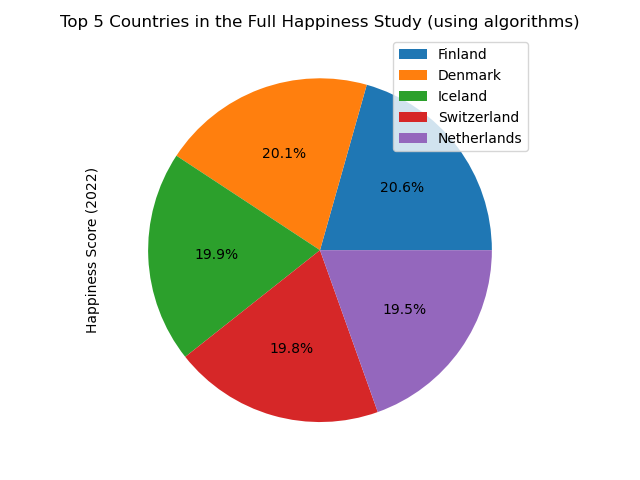

In [108]:
# Generate a pie plot showing the distribution of the Overall Happiness Score for 2022 using pyplot later on
Top5_algorithm_2022_df = clean_data_df[['Country', 'Happiness Score (2022)']]
Top5_algorithm_2022_df = Top5_algorithm_2022_df.sort_values(by=['Happiness Score (2022)'], ascending=False)
Top5_algorithm_2022_df = Top5_algorithm_2022_df.iloc[:5]


# pie plot the percentages for Full Happiness Study
Top5_algorithm_2022_df = pd.DataFrame(Top5_algorithm_2022_df)
Top5_algorithm_2022_df.set_index('Country', drop=True, inplace=True)
Top5_algorithm_2022_df.plot.pie(x='Country',
                            y='Happiness Score (2022)',                            
                            autopct="%1.1f%%",
                            legend=True,
                            labeldistance=None,                            
                            title='Top 5 Countries in the Full Happiness Study (using algorithms)'
                            )
plt.tight_layout()

# save image to file
plt.savefig("Output_data/Top5_algorithm.png")

# show image


In [109]:
Top5_algorithm_2022_df

,Happiness Score (2022)
Country,
Finland,7.821
Denmark,7.636
Iceland,7.557
Switzerland,7.512
Netherlands,7.415


In [110]:
agg_2027_data

,Country,Family (2027) Proj,Health (2027) Proj,Freedom (2027) Proj,Perceptions of Corruption (2027) Proj,Generosity (2027) Proj,Happiness Score (2022 1/2),Happiness Score (2027)
0,Switzerland,1.368183,0.872775,0.645832,0.403631,0.237957,3.333,3.528378
1,Iceland,1.450433,0.859802,0.657912,0.159104,0.379718,3.302,3.506970
2,Denmark,1.394711,0.814553,0.663226,0.455217,0.286946,3.459,3.614654
3,Norway,1.379710,0.817279,0.672876,0.379624,0.300591,3.444,3.550080
4,Canada,1.335332,0.839879,0.632281,0.319748,0.344794,3.215,3.472034
...,...,...,...,...,...,...,...,...
111,Ivory Coast,0.697465,0.146061,0.449150,0.129200,0.171816,1.488,1.593691
112,Burkina Faso,0.836117,0.260838,0.345608,0.125417,0.208124,1.579,1.776103
113,Afghanistan,0.302197,0.241160,0.088568,0.042463,0.218924,0.383,0.893313
114,Benin,0.251362,0.264015,0.445890,0.115304,0.169234,1.235,1.245805


<IPython.core.display.Javascript object>


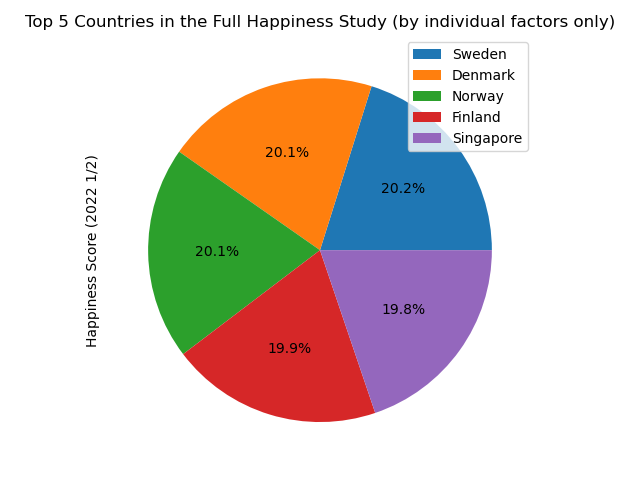

In [111]:
# Generate a pie plot showing the distribution of the Happiness Score by individual factors for 2022 using pyplot later on
Top5_study_2022_df = agg_2027_data[['Country', 'Happiness Score (2022 1/2)']]
Top5_study_2022_df

Top5_study_2022_df = Top5_study_2022_df.sort_values(by=['Happiness Score (2022 1/2)'], ascending=False)
Top5_study_2022_df = Top5_study_2022_df.iloc[:5]

# pie plot the percentages for Full Happiness Study
Top5_study_2022_df = pd.DataFrame(Top5_study_2022_df)
Top5_study_2022_df.set_index('Country', drop=True, inplace=True)
Top5_study_2022_df.plot.pie(x='Country',
                            y='Happiness Score (2022 1/2)',                            
                            autopct="%1.1f%%",
                            legend=True,
                            labeldistance=None,                            
                            title='Top 5 Countries in the Full Happiness Study (by individual factors only)'
                            )
plt.tight_layout()

# save image to file
plt.savefig("Output_data/Top5_study.png")

# show image


In [112]:
Top5_study_2022_df

,Happiness Score (2022 1/2)
Country,
Sweden,3.461
Denmark,3.459
Norway,3.444
Finland,3.412
Singapore,3.400


<IPython.core.display.Javascript object>


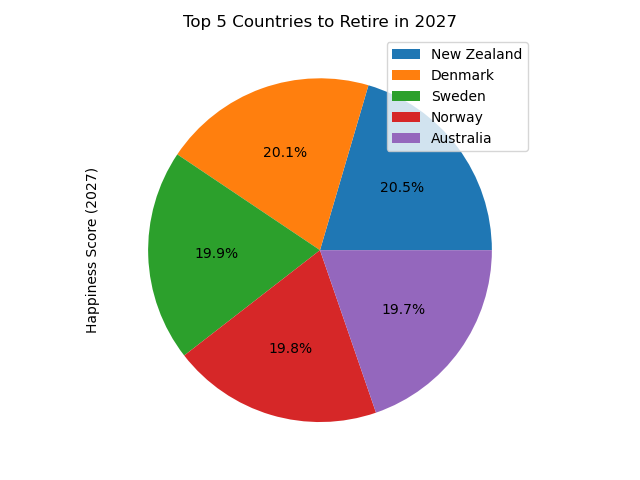

In [113]:
# Generate a pie plot showing the distribution of the Overall Happiness Score for 2027 projections using pyplot later on
Top5_team_2027_df = agg_2027_data[['Country', 'Happiness Score (2027)']]
Top5_team_2027_df = Top5_team_2027_df.sort_values(by=['Happiness Score (2027)'], ascending=False)
Top5_team_2027_df = Top5_team_2027_df.iloc[:5]
Top5_team_2027_df

# pie plot the percentages for Full Happiness Study
Top5_team_2027_df = pd.DataFrame(Top5_team_2027_df)
Top5_team_2027_df.set_index('Country', drop=True, inplace=True)
Top5_team_2027_df.plot.pie(x='Country',
                            y='Happiness Score (2027)',                            
                            autopct="%1.1f%%",
                            legend=True,
                            labeldistance=None,                            
                            title='Top 5 Countries to Retire in 2027'
                            )
plt.tight_layout()

# save image to file
plt.savefig("Output_data/Top5_team.png")

# show image
plt.show()

In [114]:
Top5_team_2027_df

,Happiness Score (2027)
Country,
New Zealand,3.669943
Denmark,3.614654
Sweden,3.572438
Norway,3.550080
Australia,3.538381
